<a href="https://colab.research.google.com/github/nchibana/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Nayomi_Chibana_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [2]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [3]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [4]:
merged = pd.merge(cell_phones, population, how='inner', on=['geo', 'time'])
print(merged.shape)

(8590, 4)


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [5]:
new_geo_country_codes = geo_country_codes[['geo', 'country']]
print(new_geo_country_codes.shape)
new_geo_country_codes.head()

(273, 2)


,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [6]:
df = pd.merge(merged, new_geo_country_codes)
print(df.shape)

(8590, 5)


In [7]:
df.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [8]:
df['cell_phones_per_person'] = df['cell_phones_total']/df['population_total']
df.tail()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8585,zwe,2013,13633167.0,15054506,Zimbabwe,0.905587
8586,zwe,2014,11798652.0,15411675,Zimbabwe,0.765566
8587,zwe,2015,12757410.0,15777451,Zimbabwe,0.808585
8588,zwe,2016,12878926.0,16150362,Zimbabwe,0.797439
8589,zwe,2017,14092104.0,16529904,Zimbabwe,0.852522


In [9]:
usa = df[df['country'] == 'United States']
usa[usa['time'].isin([2017])]

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8134,usa,2017,395881000.0,324459463,United States,1.220125


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [11]:
df['geo'] = df['geo'].str.upper()
df.head()

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [12]:
df.describe(exclude='object')

,time,cell_phones_total,population_total,cell_phones_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [13]:
df.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,IRL,Vietnam
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
pd.options.display.float_format = '{:,}'.format

In [17]:
df[df['time'].isin([2017])].nlargest(5, 'cell_phones_total')

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
1084,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [21]:
china = df[df['country'] == 'China']
china[china['cell_phones_total'] >= china['population_total']]

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978


In [22]:
usa[usa['cell_phones_total'] >= usa['population_total']]
#The first year the USA had more cell phones than people was in 2014

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
8131,usa,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,usa,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,usa,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [44]:
edited_df = df[(df['country'] == 'China') | (df['country'] == 'India') | (df['country'] == 'United States') | (df['country'] == 'Indonesia') | (df['country'] == 'Brazil')]
edited_df.describe(exclude='number')

,geo,country
count,227,227
unique,5,5
top,CHN,Indonesia
freq,46,46


In [46]:
edited_time_df = edited_df[(edited_df['time'] >= 2007) & (edited_df['time'] <= 2017)]
edited_time_df

,geo,time,cell_phones_total,population_total,country,cell_phones_per_person
1074,BRA,2007,"120,980,103.0",191026637,Brazil,0.6333153580042348
1075,BRA,2008,"150,641,403.0",192979029,Brazil,0.7806102237150339
1076,BRA,2009,"169,385,584.0",194895996,Brazil,0.869107562373934
1077,BRA,2010,"196,929,978.0",196796269,Brazil,1.000679428531239
1078,BRA,2011,"234,357,507.0",198686688,Brazil,1.1795330092774006
1079,BRA,2012,"248,323,703.0",200560983,Brazil,1.2381456217733038
1080,BRA,2013,"271,099,799.0",202408632,Brazil,1.3393687626918995
1081,BRA,2014,"280,728,796.0",204213133,Brazil,1.3746853195773652
1082,BRA,2015,"257,814,274.0",205962108,Brazil,1.2517558521007175
1083,BRA,2016,"244,067,356.0",207652865,Brazil,1.1753623336716303


In [48]:
pt = pd.pivot_table(edited_time_df, values='cell_phones_total', index='country', columns='time')
print(pt.shape)
pt

(5, 11)


time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [50]:
pt['increase_cell_phones'] = pt[2017] - pt[2007]
pt.head()

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,increase_cell_phones
country,,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0","115,508,445.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0","926,791,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0","935,282,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0","365,536,321.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0","146,581,000.0"


In [51]:
pt.sort_values(by=['increase_cell_phones'], ascending=False)

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,increase_cell_phones
country,,,,,,,,,,,,
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0","935,282,277.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0","926,791,000.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0","365,536,321.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0","146,581,000.0"
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0","115,508,445.0"


In [0]:
#India had 935,282,277 more cell phones in 2017 versus 2007

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [54]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [57]:
ct = pd.crosstab(df['Year'], df['Occupation']).apply(lambda r: r/r.sum(), axis=1)
ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
2004,0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
2005,0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
2006,0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
2007,0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963


### Part 2 — Recreate this explanatory visualization:

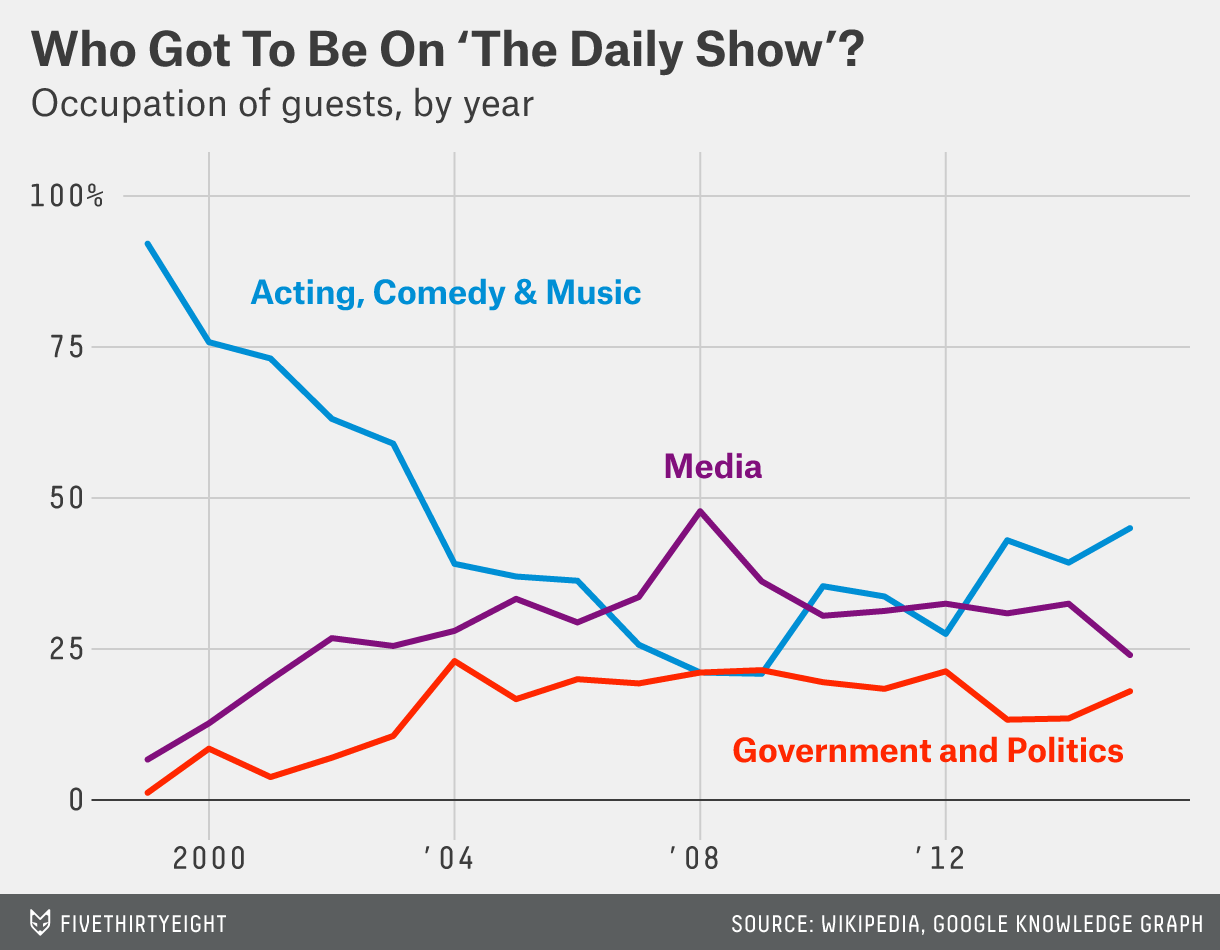

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

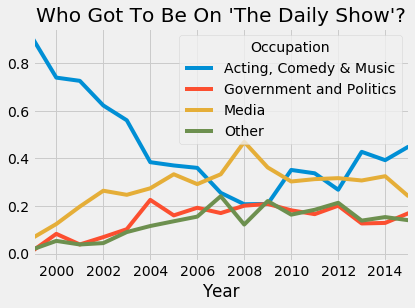

In [121]:
plt.style.use('fivethirtyeight') 
ct.plot(title="Who Got To Be On 'The Daily Show'?");

In [78]:
ct_copy = ct.reset_index()
ct_copy

Occupation,Year,"Acting, Comedy & Music",Government and Politics,Media,Other
0,1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
1,2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2,2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
3,2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
4,2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
5,2004,0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
6,2005,0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
7,2006,0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
8,2007,0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963
9,2008,0.2073170731707317,0.20121951219512196,0.4695121951219512,0.12195121951219512


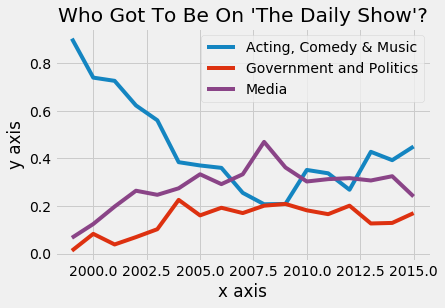

In [118]:
plt.style.use('fivethirtyeight')
x  = ct_copy['Year']
y1 = ct_copy['Acting, Comedy & Music']
y2 = ct_copy['Government and Politics']
y3 = ct_copy['Media']
plt.plot(x, y1, label="Acting, Comedy & Music", color='#1485c1')
plt.plot(x, y2, label="Government and Politics", color='#dd3110')
plt.plot(x, y3, label="Media", color='#8a4487')
plt.legend()
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Who Got To Be On 'The Daily Show'?")
plt.show()

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [122]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [148]:
df['appearance_count']= df['Guest'].map(df['Guest'].value_counts())
df[df['Guest'] == 'Fareed Zakaria']

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation,appearance_count
355,2001,journalist,10/18/01,Media,Fareed Zakaria,Media,19
740,2003,journalist,4/24/03,Media,Fareed Zakaria,Media,19
834,2004,journalist,10/20/04,Media,Fareed Zakaria,Media,19
906,2004,journalist,4/28/04,Media,Fareed Zakaria,Media,19
993,2005,journalist,1/31/05,Media,Fareed Zakaria,Media,19
1107,2005,journalist,7/21/05,Media,Fareed Zakaria,Media,19
1188,2006,journalist,12/12/06,Media,Fareed Zakaria,Media,19
1219,2006,journalist,3/28/06,Media,Fareed Zakaria,Media,19
1401,2007,journalist,6/20/07,Media,Fareed Zakaria,Media,19
1449,2008,journalist,1/14/08,Media,Fareed Zakaria,Media,19


In [162]:
df_final = df[['Guest', 'appearance_count']]
df_result = df_final.drop_duplicates(subset=['Guest'])
df_result

,Guest,appearance_count
0,Michael J. Fox,2
1,Sandra Bernhard,1
2,Tracey Ullman,5
3,Gillian Anderson,2
4,David Alan Grier,2
5,William Baldwin,2
6,Michael Stipe,2
7,Carmen Electra,2
8,Matthew Lillard,1
9,David Cross,5


In [167]:
df_top = df_result.nlargest(10, 'appearance_count')
df_top

,Guest,appearance_count
355,Fareed Zakaria,19
150,Denis Leary,17
786,Brian Williams,16
44,Paul Rudd,13
1134,Ricky Gervais,13
533,Tom Brokaw,12
163,Richard Lewis,10
167,Will Ferrell,10
341,Bill O'Reilly,10
1065,Reza Aslan,10


In [188]:
df_test = df_top.rename_axis(None)
df_test

,appearance_count
Fareed Zakaria,19
Denis Leary,17
Brian Williams,16
Paul Rudd,13
Ricky Gervais,13
Tom Brokaw,12
Richard Lewis,10
Will Ferrell,10
Bill O'Reilly,10
Reza Aslan,10


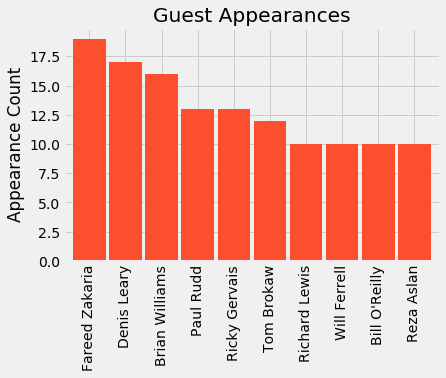

In [192]:
plt.style.use('fivethirtyeight') 
df_test.plot.bar(color='C1', width=0.9, legend=False)
plt.ylabel("Appearance Count")
plt.title("Guest Appearances")
plt.show()